Reading file: /anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e/0006/rmsd/0006_rmsd.xvg
Reading file: /anfhome/shared/qipd/newmds/postprocess/NAD_in_DE/6800f629-7cb9-4526-9f85-0c19eab37653/0006/rmsd/0006_rmsd.xvg
Reading file: /anfhome/shared/qipd/newmds/postprocess/NAD_in_A/563e2df5-82de-4918-967d-70e733cfa584/0006/rmsd/0006_rmsd.xvg
Reading file: /anfhome/shared/qipd/newmds/postprocess/NAD_in_AD/eda6b09c-b9f2-42c9-be15-0204ed29807a/0006/rmsd/0006_rmsd.xvg


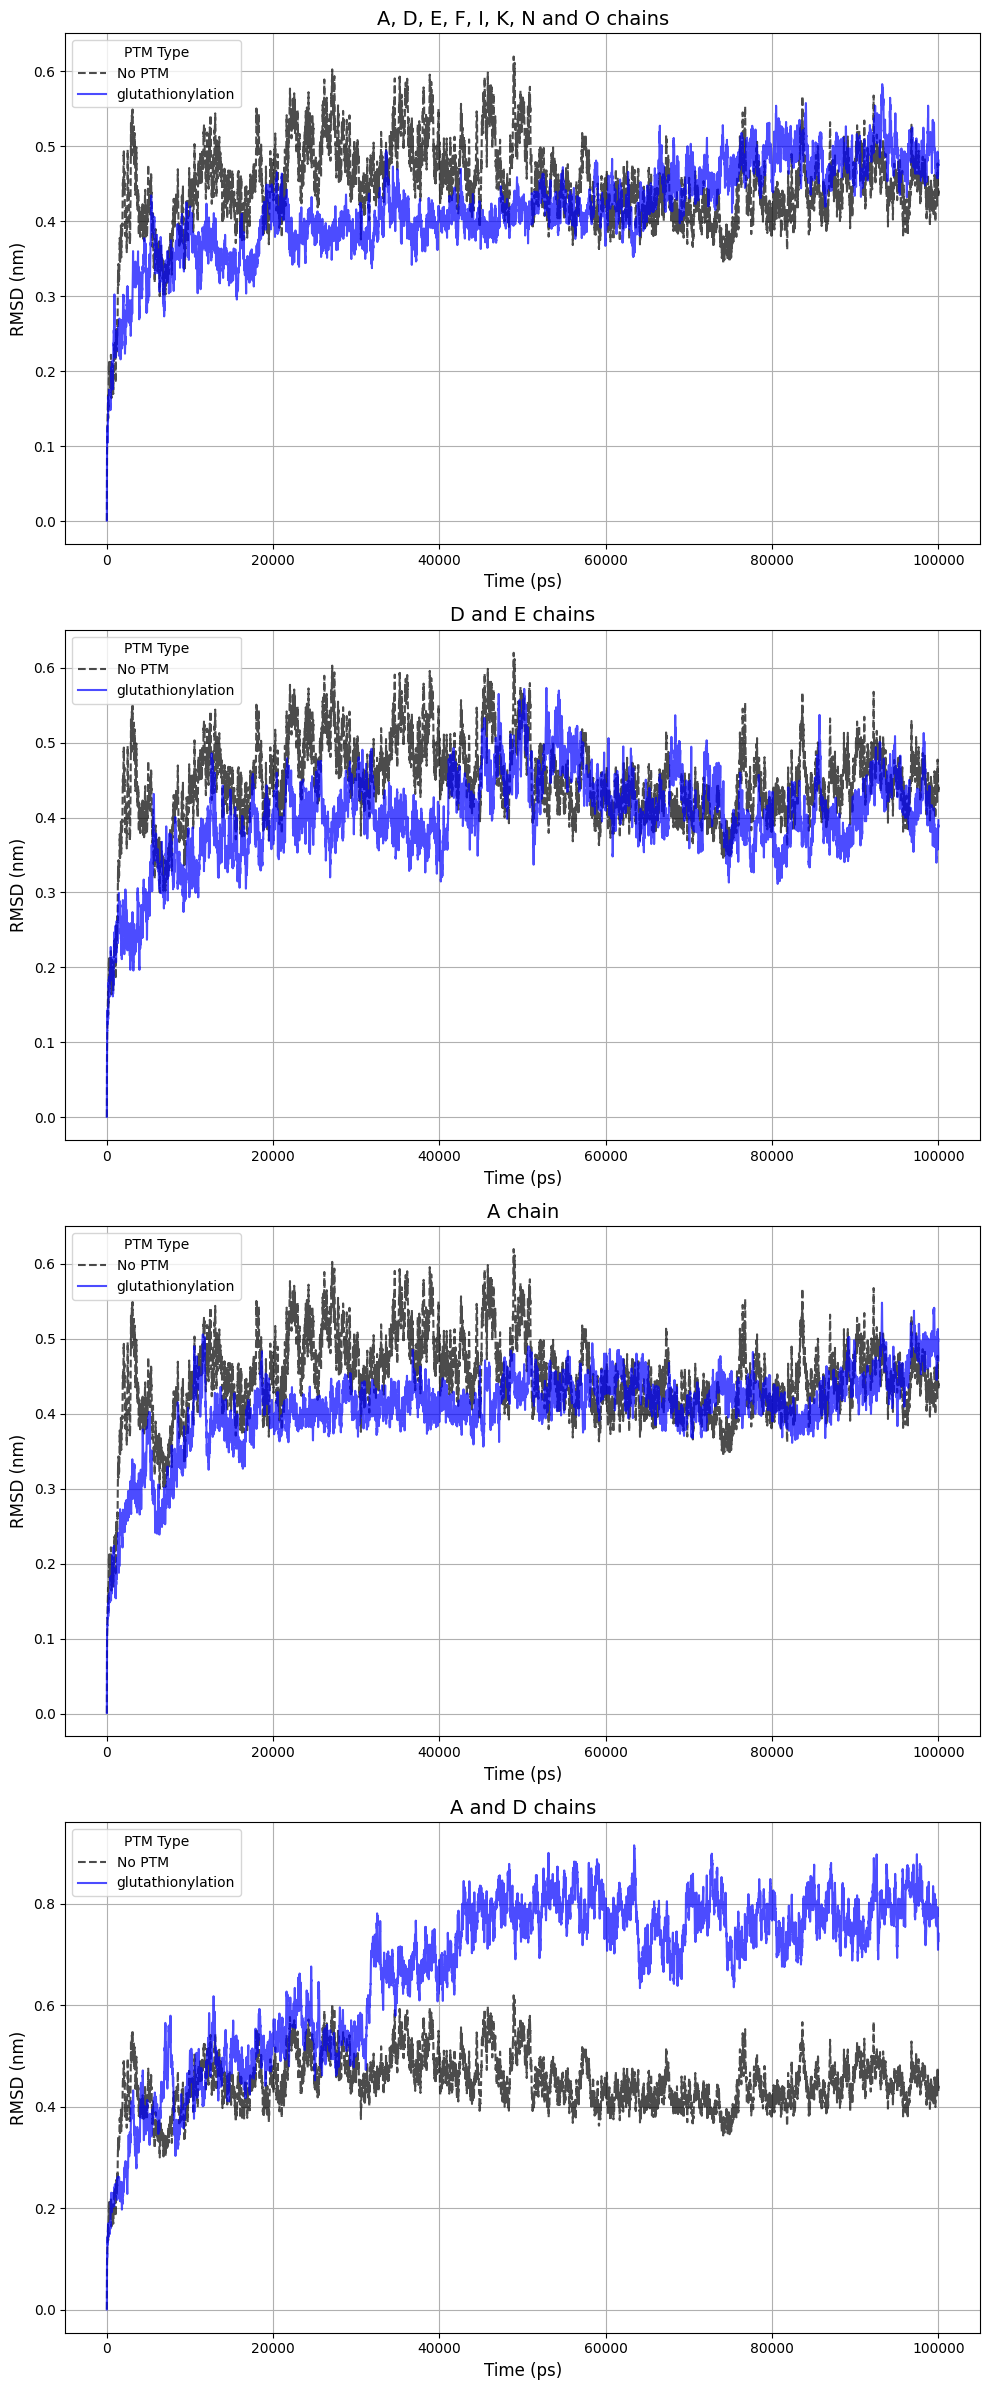

In [28]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Mapping of numerical labels to PTM types
PTM_TYPES = {
    "0000": "reduction",
    "0001": "nitrosylation",
    "0002": "sulfhydration",
    "0003": "glutathionylation",
    "0004": "nitrosylation",
    "0005": "sulfhydration",
    "0006": "glutathionylation",
    "0007": "nitrosylation",
    "0008": "sulfhydration",
    "0009": "glutathionylation",
    "0010": "nitrosylation",
    "0011": "sulfhydration",
    "0012": "glutathionylation",
    "0013": "reduction",
    "0014": "reduction",
    "0015": "reduction"
}
# Example start and end indices
start_indices = [336, 653, 728, 1065, 1402, 1739, 2056, 2131, 2468, 2785, 3122, 3439, 3514, 3851, 4188]
end_indices = [653, 728, 1065, 1402, 1739, 2056, 2131, 2468, 2785, 3122, 3439, 3514, 3851, 4188, 4263]

protein_and_chain = [
    "GAP 1A", "PRK 1B", "CP12 1C", "GAP 1D", "GAP 1E", "GAP 1F",
    "PRK 2G", "CP12 2H", "GAP 2I", "PRK 1J", "GAP 2K", "PRK 2L",
    "CP12 3M", "GAP 2N", "GAP 2O"

def extract_nad_variation(path):
    postprocess_part = path.split("/postprocess/")[1]
    nad_variation = postprocess_part.split("/")[0]
    if 'no_PTM' in nad_variation:
        return "No PTMs"
    parts = nad_variation.split('_')
    if len(parts) > 2:
        chains = parts[2]
        if len(chains) == 1:
            return f"{chains} chain"
        elif len(chains) > 1:
            return f"{', '.join(list(chains[:-1]))} and {chains[-1]} chains"
    return nad_variation

# Define base paths
rmsf_data = {
    base_path: [] for base_path in [
        "/anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e",
        "/anfhome/shared/qipd/newmds/postprocess/NAD_in_DE/6800f629-7cb9-4526-9f85-0c19eab37653",
        "/anfhome/shared/qipd/newmds/postprocess/NAD_in_A/563e2df5-82de-4918-967d-70e733cfa584",
        "/anfhome/shared/qipd/newmds/postprocess/NAD_in_AD/eda6b09c-b9f2-42c9-be15-0204ed29807a"
    ]
}

# Read "no PTM" data
no_ptm_base_path = "/anfhome/shared/qipd/newmds/postprocess/no_PTM/randomstring"
no_ptm_file_path = os.path.join(no_ptm_base_path, '0000', 'rmsd', 'sequential_rmsd.xvg')
no_ptm_data = []
if os.path.exists(no_ptm_file_path):
    with open(no_ptm_file_path, "r") as fh:
        #print(f"Reading file: {file_path}")
        rmsd = fh.readlines()
    # Start reading from line 18
    rmsd = rmsd[18:]
    time = [float(line.split()[0]) for line in rmsd]
    rmsd_values = [float(line.split()[1]) for line in rmsd]
    no_ptm_data = (time, rmsd_values, "No PTM")

# Collect RMSD data for each base path
for base_path in rmsf_data:
    for i in [6]:  # from 0000 to 0015
        file_path = os.path.join(base_path, f'{i:04d}', 'rmsd', f'{i:04d}_rmsd.xvg')
        if os.path.exists(file_path):
            print(f"Reading file: {file_path}")
            with open(file_path, "r") as fh:
                rmsd = fh.readlines()
            rmsd = rmsd[18:]
            time = [float(line.split()[0]) for line in rmsd]
            rmsd_values = [float(line.split()[1]) for line in rmsd]
            rmsf_data[base_path].append((time, rmsd_values, PTM_TYPES[f'{i:04d}']))            

# Choose a colormap
cmap = plt.get_cmap('bwr')

# Plotting the RMSD data for each base path
fig, axes = plt.subplots(len(rmsf_data), 1, figsize=(10, 6 * len(rmsf_data)))

for ax, (base_path, data) in zip(axes, rmsf_data.items()):
    # Plot "no PTM" data with reduced opacity
    if no_ptm_data:
        ax.plot(no_ptm_data[0], no_ptm_data[1], label=no_ptm_data[2], linestyle='--', color='black', alpha=0.7)

    # Plot other data with a colormap
    for idx, (time, rmsd_values, label) in enumerate(data):
        color = cmap(idx / len(data))  # Get consistent color based on index
        ax.plot(time, rmsd_values, label=label, color=color, alpha=0.7)

    ax.set_xlabel("Time (ps)", fontsize=12)
    ax.set_ylabel("RMSD (nm)", fontsize=12)
    ax.set_title(extract_nad_variation(base_path), fontsize=14)
    ax.grid(True)
    ax.legend(title="PTM Type", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 
'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 
\'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu',
'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds',
'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia',
'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 
'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 
'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 
'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 
'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink',
'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring',
'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r',
'viridis', 'viridis_r', 'winter', 'winter_r'

In [26]:
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns  # Import Seaborn

# Mapping of numerical labels to PTM types
PTM_TYPES = {
    "0000": "reduction",
    "0001": "nitrosylation",
    "0002": "sulfhydration",
    "0003": "glutathionylation",
    "0004": "nitrosylation",
    "0005": "sulfhydration",
    "0006": "glutathionylation",
    "0007": "nitrosylation",
    "0008": "sulfhydration",
    "0009": "glutathionylation",
    "0010": "nitrosylation",
    "0011": "sulfhydration",
    "0012": "glutathionylation",
    "0013": "reduction",
    "0014": "reduction",
    "0015": "reduction"
}

def extract_nad_variation(path):
    postprocess_part = path.split("/postprocess/")[1]
    nad_variation = postprocess_part.split("/")[0]
    if 'no_PTM' in nad_variation:
        return "No PTMs"
    parts = nad_variation.split('_')
    if len(parts) > 2:
        chains = parts[2]
        if len(chains) == 1:
            return f"{chains} chain"
        elif len(chains) > 1:
            return f"{', '.join(list(chains[:-1]))} and {chains[-1]} chains"
    return nad_variation

# Define base paths
rmsf_data = {
    base_path: [] for base_path in [
        "/anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e",
        "/anfhome/shared/qipd/newmds/postprocess/NAD_in_DE/6800f629-7cb9-4526-9f85-0c19eab37653",
        "/anfhome/shared/qipd/newmds/postprocess/NAD_in_A/563e2df5-82de-4918-967d-70e733cfa584",
        "/anfhome/shared/qipd/newmds/postprocess/NAD_in_AD/eda6b09c-b9f2-42c9-be15-0204ed29807a"
    ]
}

# Read "no PTM" data
no_ptm_base_path = "/anfhome/shared/qipd/newmds/postprocess/no_PTM/randomstring"
no_ptm_file_path = os.path.join(no_ptm_base_path, '0000', 'rmsd', 'sequential_rmsd.xvg')
no_ptm_data = []
if os.path.exists(no_ptm_file_path):
    with open(no_ptm_file_path, "r") as fh:
        rmsd = fh.readlines()
    # Start reading from line 18
    rmsd = rmsd[18:]
    time = [float(line.split()[0]) for line in rmsd]
    rmsd_values = [float(line.split()[1]) for line in rmsd]
    no_ptm_data = (time, rmsd_values, "No PTM")

# Collect RMSD data for each base path
for base_path in rmsf_data:
    for i in range(1, 16):  # from 0001 to 0015
        file_path = os.path.join(base_path, f'{i:04d}', 'rmsd', f'{i:04d}_rmsd.xvg')
        if os.path.exists(file_path):
            with open(file_path, "r") as fh:
                rmsd = fh.readlines()
            rmsd = rmsd[18:]
            time = [float(line.split()[0]) for line in rmsd]
            rmsd_values = [float(line.split()[1]) for line in rmsd]
            rmsf_data[base_path].append((time, rmsd_values, PTM_TYPES[f'{i:04d}']))

# Use Seaborn's "Spectral" color palette as a colormap
cmap = sns.color_palette("Spectral", as_cmap=True)

# Plotting the RMSD data for each base path
fig, axes = plt.subplots(len(rmsf_data), 1, figsize=(10, 6 * len(rmsf_data)))

for ax, (base_path, data) in zip(axes, rmsf_data.items()):
    # Plot "no PTM" data with reduced opacity
    if no_ptm_data:
        ax.plot(no_ptm_data[0], no_ptm_data[1], label=no_ptm_data[2], linestyle='--', color='black', alpha=0.7)

    # Plot other data with the Spectral colormap
    for idx, (time, rmsd_values, label) in enumerate(data):
        color = cmap(idx / len(data))  # Get a color from the Seaborn colormap
        ax.plot(time, rmsd_values, label=label, color=color, alpha=0.7)

    ax.set_xlabel("Time (ps)", fontsize=12)
    ax.set_ylabel("RMSD (nm)", fontsize=12)
    ax.set_title(extract_nad_variation(base_path), fontsize=14)
    ax.grid(True)
    ax.legend(title="PTM Type", fontsize=10)

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [28]:
!pip install seaborn

/bin/sh: pip: command not found


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Mapping of numerical labels to PTM types
PTM_TYPES = {
    "0000": "reduction",
    "0001": "nitrosylation",
    "0002": "sulfhydration",
    "0003": "glutathionylation",
    "0004": "nitrosylation",
    "0005": "sulfhydration",
    "0006": "glutathionylation",
    "0007": "nitrosylation",
    "0008": "sulfhydration",
    "0009": "glutathionylation",
    "0010": "nitrosylation",
    "0011": "sulfhydration",
    "0012": "glutathionylation",
    "0013": "reduction",
    "0014": "reduction",
    "0015": "reduction"
}

def extract_nad_variation(path):
    postprocess_part = path.split("/postprocess/")[1]
    nad_variation = postprocess_part.split("/")[0]
    if 'no_PTM' in nad_variation:
        return "No PTMs"
    parts = nad_variation.split('_')
    if len(parts) > 2:
        chains = parts[2]
        if len(chains) == 1:
            return f"{chains} chain"
        elif len(chains) > 1:
            return f"{', '.join(list(chains[:-1]))} and {chains[-1]} chains"
    return nad_variation

# Define base paths
rmsf_data = {
    base_path: [] for base_path in [
        "/anfhome/shared/qipd/newmds/postprocess/NAD_in_ADEFIKNO/1280ec92-875e-450d-966b-4550ebedc82e",
        "/anfhome/shared/qipd/newmds/postprocess/NAD_in_DE/6800f629-7cb9-4526-9f85-0c19eab37653",
        "/anfhome/shared/qipd/newmds/postprocess/NAD_in_A/563e2df5-82de-4918-967d-70e733cfa584",
        "/anfhome/shared/qipd/newmds/postprocess/NAD_in_AD/eda6b09c-b9f2-42c9-be15-0204ed29807a"
    ]
}

rmsf_data_100 = {base_path: [] for base_path in rmsf_data}

# Read "no PTM" data
no_ptm_base_path = "/anfhome/shared/qipd/newmds/postprocess/no_PTM/randomstring"
no_ptm_file_path = os.path.join(no_ptm_base_path, '0000', 'rmsd', 'sequential_rmsd.xvg')
no_ptm_data = []

if os.path.exists(no_ptm_file_path):
    with open(no_ptm_file_path, "r") as fh:
        print(f"Reading file: {no_ptm_file_path}")
        rmsd = fh.readlines()
        # Skip header lines; start reading from line 18
        rmsd = rmsd[18:]
        
        # Extract time and rmsd values
        time = [float(line.split()[0]) for line in rmsd]
        rmsd_values = [float(line.split()[1]) for line in rmsd]

        # Convert rmsd_values to a numpy array for calculation
        rmsd_values = np.array(rmsd_values)

        # Calculate n as the number of rmsd_values
        n = len(rmsd_values)

        # Calculate rmsf_100 using the formula
        # Avoid division by zero by checking n > 0
        if n > 0:
            factor = 1 + np.log(np.sqrt(n / 100))
            rmsd_100 = rmsd_values / factor

            # Convert arrays back to lists for storage
            time_list = time  # Assuming time doesn't need numpy array operations
            rmsd_list = rmsd_values.tolist()
            rmsd_100_list = rmsd_100.tolist()

            # Store the data
            no_ptm_data = (time_list, rmsd_list, "No PTM")
            no_ptm_data_100 = (time_list, rmsd_100_list, "No PTM 100")

for base_path in rmsf_data:
    for i in range(0, 16):  # assuming you still want to process for i = 13
        file_path = os.path.join(base_path, f'{i:04d}', 'rmsd', f'{i:04d}_rmsd.xvg')
        if os.path.exists(file_path):
            print(f"Reading file: {file_path}")
            with open(file_path, "r") as fh:
                rmsd = fh.readlines()
                rmsd = rmsd[18:]  # Skip header lines

                # Ensure consistent data extraction
                time = []
                rmsd_values = []
                for line in rmsd:
                    parts = line.split()
                    if len(parts) >= 2:  # Make sure line has enough data
                        time.append(float(parts[0]))
                        rmsd_values.append(float(parts[1]))

                # Convert lists to numpy arrays for compatibility and calculations
                time = np.array(time)
                rmsd_values = np.array(rmsd_values)

                # Check if the lengths of time and rmsd_values match
                if len(time) != len(rmsd_values):
                    print(f"Warning: Time and RMSD values length mismatch in {file_path}")
                else:
                    # Calculate n as the number of rmsd_values
                    n = 4264

                    # Compute rmsd_100 using the given formula, if lengths match
                    factor = 1 + np.log(np.sqrt(n / 100))
                    rmsd_100 = rmsd_values / factor

                    rmsf_data[base_path].append((time.tolist(), rmsd_values.tolist(), PTM_TYPES[f'{i:04d}']))
                    rmsf_data_100[base_path].append((time.tolist(), rmsd_100.tolist(), PTM_TYPES[f'{i:04d}']))


# Colormap for distinguishing PTM types
cmap = plt.get_cmap('plasma')

# Create subplots for the RMSF data
fig, axes = plt.subplots(len(rmsf_data_100), 1, figsize=(8, 6 * len(rmsf_data_100)))

# If there's only one plot, `axes` won't be an array, so this handles that case:
if len(rmsf_data_100) == 1:
    axes = [axes]

for ax, (base_path, data) in zip(axes, rmsf_data_100.items()):
    # Plot "no PTM" data with reduced opacity
    if no_ptm_data_100:
        ax.plot(no_ptm_data_100[0], no_ptm_data_100[1], label=no_ptm_data_100[2], linestyle='--', color='black', alpha=0.7)
    
    # Plot other data with a colormap
    for idx, (time, rmsd_values_100, label) in enumerate(data):
        color = cmap(idx / len(data))  # Get a consistent color based on index
        ax.plot(time, rmsd_values_100, label=label, color=color, alpha=0.7)

    ax.set_xlabel("Time (ps)", fontsize=12)
    ax.set_ylabel("Normalized RMSD (nm)", fontsize=12)
    ax.set_title(extract_nad_variation(base_path), fontsize=14)
    ax.grid(True)
    ax.legend(title="PTM Type", fontsize=10)

plt.tight_layout()
plt.show()